<a href="https://colab.research.google.com/github/baricio00/Health-Informatics-2025-26/blob/main/Copy_of_Lab_III_SMHD_25_26_TBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<font size="6">Statistical Models for Healthcare Data</font>**

**<font size="5">MSc in Health Informatics - UniSR - A.Y. 2025-2026</font>**

Prof. Lara Cavinato - Dott. Vittorio Torri

---

<font size="4">Lab III - Linear Regression</font>

# Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import numpy as np

In [3]:
np.random.seed(1234)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import statsmodels.api as sm

In [6]:
import scipy.stats as stats

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Dataset

Same dataset as Labs I and II

In [9]:
df = pd.read_csv('heartFailureClinicalRecordsDatasetSmhd.csv')

In [10]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


In [11]:
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

# Simple Linear Regression

Let's look at the scatterplot of bmi and ejection fraction

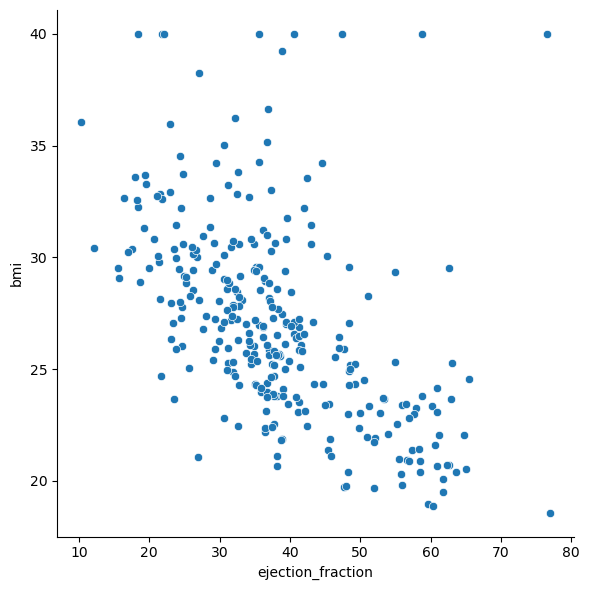

In [12]:
sns.relplot(x="ejection_fraction", y="bmi",
            height=6, data=df)

It looks like there is a relationship between them: we can try to predict BMI based on ejection fraction

$$ bmi = \beta_0 + \beta_1 \cdot ef + \epsilon $$

In [13]:
X = df[['ejection_fraction']]
y = df['bmi']
# Linear regression = certain numerical variable as a linear function of other variables

In [14]:
X

,ejection_fraction
0,20.73
1,29.02
2,26.24
3,10.21
4,19.33
...,...
294,38.05
295,35.20
296,62.32
297,37.49


In [15]:
X_const = sm.add_constant(X)

In [16]:
X_const

,const,ejection_fraction
0,1.00,20.73
1,1.00,29.02
2,1.00,26.24
3,1.00,10.21
4,1.00,19.33
...,...,...
294,1.00,38.05
295,1.00,35.20
296,1.00,62.32
297,1.00,37.49


the central part is the summary
First thing to look at is standard error. The higher it is, the more uncertain it is

In [17]:
model = sm.OLS(y, X_const)
results = model.fit() # will round the computation
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     117.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.06e-23
Time:                        00:58:45   Log-Likelihood:                -821.26
No. Observations:                 299   AIC:                             1647.
Df Residuals:                     297   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                34.5154      0.71

$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}}$$

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = results.predict(X_const)

r2 = r2_score(y,y_pred)
mse = mean_squared_error(y,y_pred)

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}') # the mean of the square of the errors

R2: 0.2829
MSE: 14.2321


C:\Users\ricca\AppData\Local\Temp\ipykernel_18244\265078118.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="ejection_fraction", y="bmi", palette="muted", height=6, data=df)


<Axes: xlabel='ejection_fraction', ylabel='bmi'>

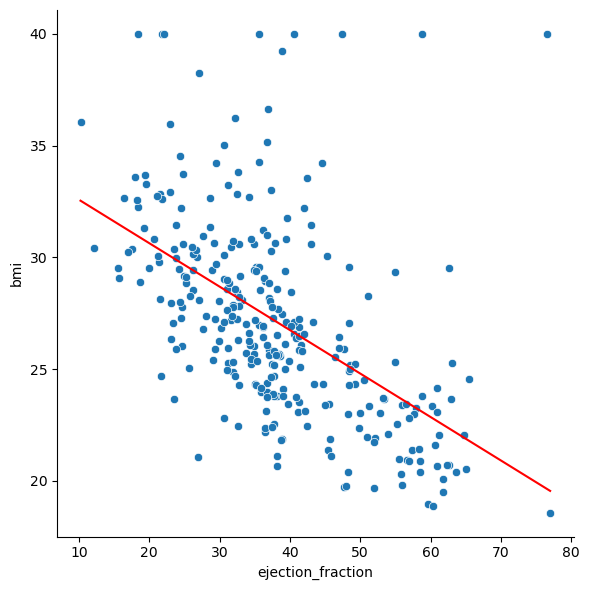

In [19]:
X_plot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1) # creates a grid of points on the x-axis (bmi) with step=0.1
X_plot = sm.add_constant(X_plot)
y_plot = results.predict(X_plot) # predict the model's output on this grid
sns.relplot(x="ejection_fraction", y="bmi", palette="muted", height=6, data=df)
sns.lineplot(x=X_plot[:,1],y=y_plot,color='red') # our fitted model

the line corresponds to our model

## Train-test set

So far we are evaluating the model on the same data it was trained on..

In [20]:
from sklearn import model_selection

X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'ejection_fraction', 'time']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)
# in many case test_size can be reduced, but it's rare to see it higher, because the more the data, the more the model can learn

train_index = X_train.index
test_index = X_test.index

# if you take all the data for whatever model, there is the risk of overfitting the model ("learning by heart the data")
# If I run the model on other data, I see that the model performs better
# If I see the model performs very bad on test data, there is need to give other training data

In [21]:
len(X_train)

239

In [22]:
len(X_test)

60

In [ ]:
X_train_1 = X_train[['ejection_fraction']]
X_train_1 = sm.add_constant(X_train_1)

model = sm.OLS(y_train, X_train_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     91.11
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.76e-18
Time:                        00:58:46   Log-Likelihood:                -664.47
No. Observations:                 239   AIC:                             1333.
Df Residuals:                     237   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                34.7489      0.82

In [24]:
### TODO: COMPUTE R^2 AND MSE ON TEST DATA
X_test_1 = X_test[['ejection_fraction']]
X_test_1 = sm.add_constant(X_test_1)

y_pred = results.predict(X_test_1)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.2995
MSE: 10.3824


R2 is **higher** than the one with training data, so the model is not overfitting (instead, it's **underfitting**). The model is not performing very well, so there will be other ways to improve it

# Multiple linear regression

## Multiple input variables

$$ bmi = \beta_0 + \beta_1 \cdot age + \beta_2 \cdot \text{ creatinine_phosphokinase } + ... + \epsilon $$

In [25]:
variables = num_vars.copy()
variables.remove('bmi')

X_train_2 = X_train[variables]
X_test_2 = X_test[variables]
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)

In [26]:
model = sm.OLS(y_train, X_train_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           5.01e-73
Time:                        00:58:49   Log-Likelihood:                -520.64
No. Observations:                 239   AIC:                             1057.
Df Residuals:                     231   BIC:                             1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We have a higher R2, interesting...

When having very small coefficient, we have high P-values. If I have multiple variables and some of them have high P-value, I don't discard all of them (of course some will be useless), because they could be related in some way.

There is also a warning... the [2], if the number is very high, there could be some issue in the model, implying that some of the coefficient are not very reliable in the estimation. Why this happens?
- we have colinearity among the variables. There could be variables related to the others (how we can detect these and remove them?)
- the numerical variables have different scale and can lead to problems in computation (How to solve this issue?)

The condition number is a measure of how sensitive the solution of linear equations (like the ones for regression coefficients $\beta$) are to small changes in the input data.

In regression a high condition number implies near-linear dependencies or strongly correlated directions in feature space, even if not visible in pairwise correlations.

$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}}$$

$$ AdjR^2 = 1 - \frac{n - 1}{n - p -1} \frac{RSS}{TSS}$$

where $p$ is the number of regressors

In [27]:
y_pred = results.predict(X_test_2)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_2.shape[1] # num of input variables in the model
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) # adjusted R2
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6238
adj_R2: 0.5648
MSE: 5.5757


the adjusted R2 is significantly lower. Now we have models performing good on test data, but ...

## Collinearity

The Variance Inflation Factor (VIF) indicates how good a variable can be predicted from the others

$$
VIF_j = \frac{1}{1 - R^2_j}
$$

where $R^2_j$ is the $R^2$ of the linear regression model predicting varibale $j$ from all other variables

A high VIF means there is collinearity with some other variable

Rule of thumb: VIF > 5 for a variable is problematic

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_2.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]

print(vif_data)

                   Variable     VIF
0                     const 1158.00
1                       age    1.12
2  creatinine_phosphokinase    1.02
3         ejection_fraction    1.04
4                 platelets    1.02
5          serum_creatinine    1.07
6              serum_sodium    1.07
7                      time    1.07


Adding this variable doesn't add anything useful to the model

The correlation coefficients can also identify collinearity, but not always. If a variable X1 is a linear transformation of a variable X2, their linear correlation coefficient will be high. But if the collinearity involves a group of variable, then it might not be evident from the correlation matrix

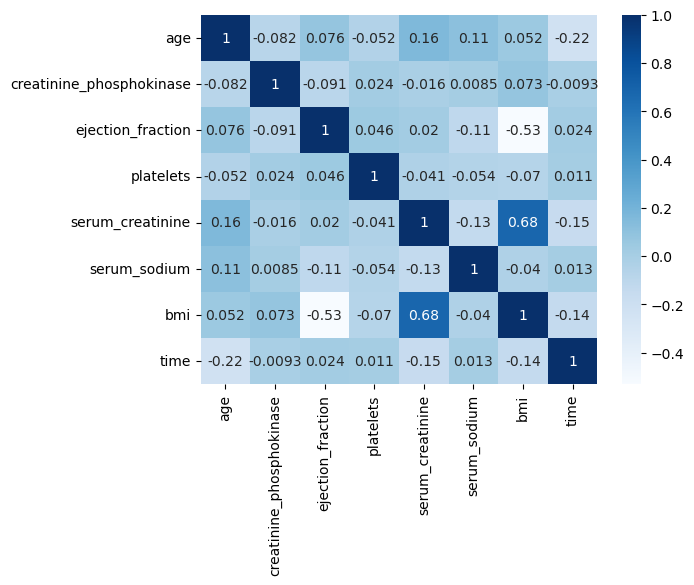

In [29]:
sns.heatmap(df[num_vars].corr(), cmap="Blues",annot=True);

## Scale variables

Numerical variables having different scales are often problematic. Many models have their coefficients' computation affected by this, but while this is not the case of linear regression with least square method, it is still useful to **standardize** the features for interpretability of coefficients and to reduce the condition numer when it is not due to a direct multicollinearity among the variables. The VIF is scale invariant, but the condition number is not.

Moreover, this is necessary when penalizations are introduced in linear regression models (more on this in the next lectures)

To standardize a variable x:

$$ z = \frac{x - \mu }{\sigma}$$

$$ $$

mu and sigma have to be estimated

In [30]:
X_train_2 = X_train[variables]
X_test_2 = X_test[variables]

scaler = StandardScaler()
X_train_2_scaled = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns, index=X_train_2.index)
X_test_2_scaled = pd.DataFrame(scaler.transform(X_test_2), columns=X_test_2.columns, index=X_test_2.index)

X_train_2_scaled = sm.add_constant(X_train_2_scaled)
X_test_2_scaled = sm.add_constant(X_test_2_scaled)

This code block handles the scaling of the numerical variables `ejection_fraction` and `serum_creatinine` before fitting the model. First, it extracts these variables for both the training and testing sets. Then, it initializes a `StandardScaler` object, which will standardize features by removing the mean and scaling to unit variance. It fits the scaler on the training data (`X_train_7`) and transforms both the training and testing data. This is crucial to prevent data leakage from the test set. The `[:, 1:]` slicing is used because the `PolynomialFeatures` function adds a constant term (column 0) that should not be scaled. Finally, it converts the scaled arrays back into pandas DataFrames, preserving column names and indices, and then explicitly adds a constant column to both the training and testing sets using `sm.add_constant` for the OLS model

In [31]:
model = sm.OLS(y_train, X_train_2_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           5.01e-73
Time:                        00:58:49   Log-Likelihood:                -520.64
No. Observations:                 239   AIC:                             1057.
Df Residuals:                     231   BIC:                             1085.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [32]:
y_pred = results.predict(X_test_2_scaled)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_2_scaled.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6238
adj_R2: 0.5648
MSE: 5.5757


## Reduce the number of variables

### EF + creatinine

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \epsilon $$

In [33]:
variables = ['ejection_fraction', 'serum_creatinine']

X_train_3 = X_train[variables]
X_test_3 = X_test[variables]
X_train_3 = sm.add_constant(X_train_3)
X_test_3 = sm.add_constant(X_test_3)

In [34]:
model = sm.OLS(y_train, X_train_3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     418.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.64e-78
Time:                        00:58:50   Log-Likelihood:                -522.44
No. Observations:                 239   AIC:                             1051.
Df Residuals:                     236   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.9120      0.48

In [35]:
y_pred = results.predict(X_test_3)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_3.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6279
adj_R2: 0.6080
MSE: 5.5148


with 2 regressors we can visualize a plane:

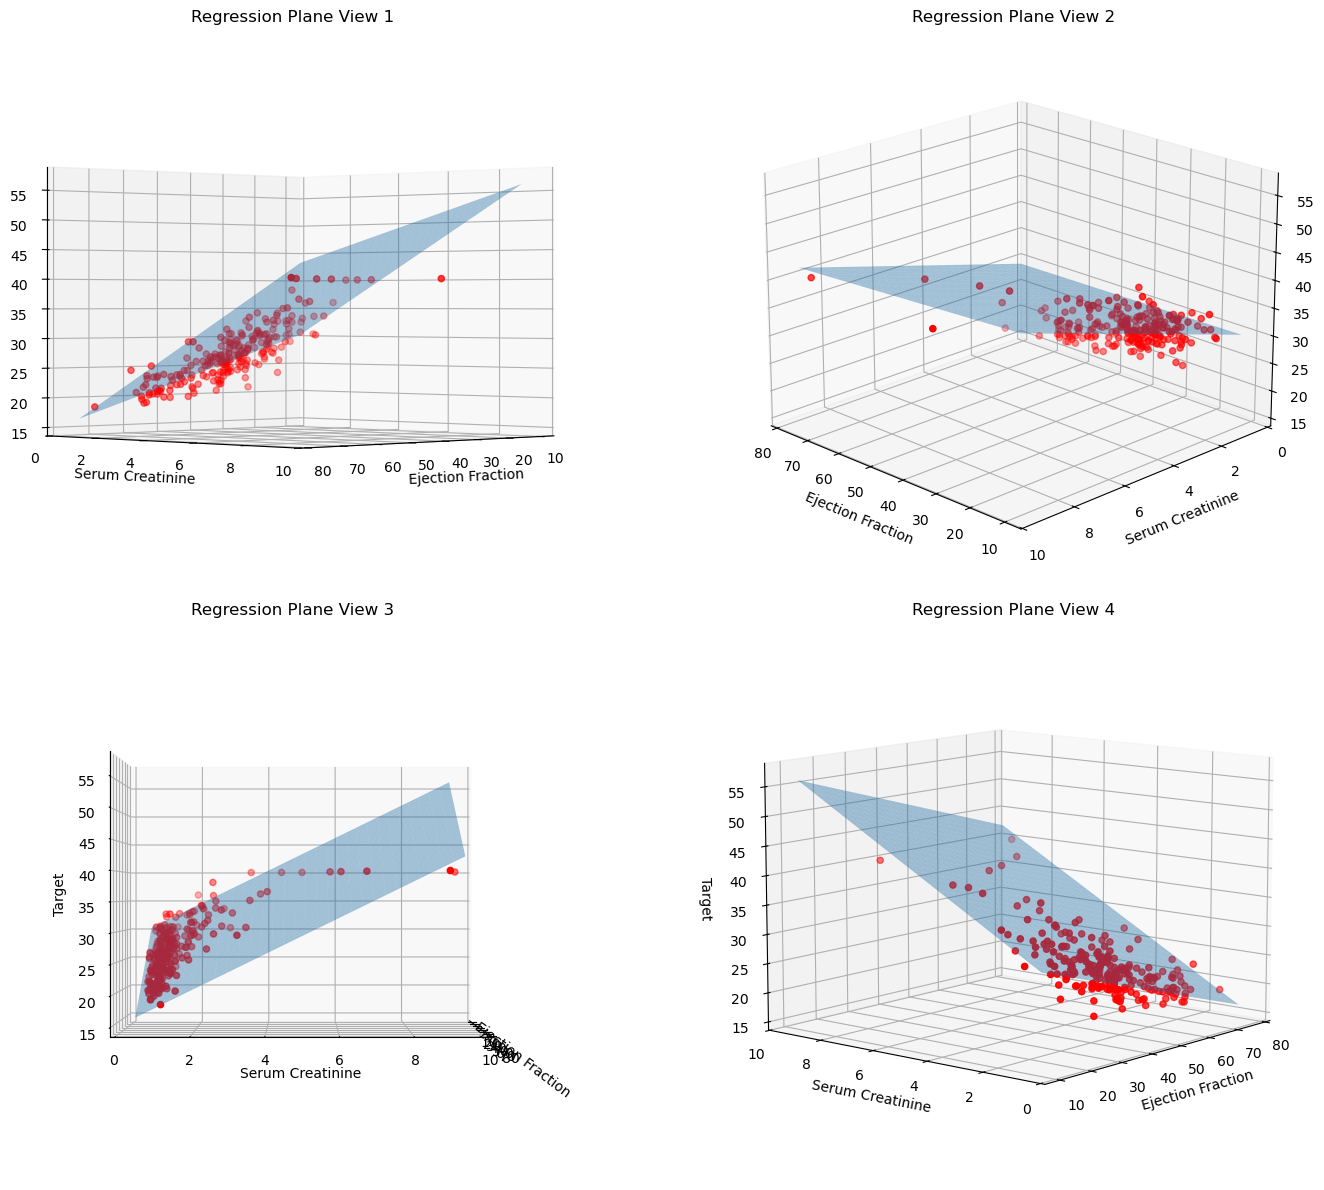

In [36]:
x1 = X_train_3['ejection_fraction']
x2 = X_train_3['serum_creatinine']
y = y_train

# Get model coefficients
b0, b1, b2 = results.params

# Create a grid for plotting the regression plane
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)

# Compute predicted y values over the grid
y_pred_grid = b0 + b1 * x1_grid + b2 * x2_grid

# Plot
fig = plt.figure(figsize=(16, 12))

views = [
    (0, 45),
    (20, 135),
    (0, 0),
    (10, 220)
]

titles = [
    "Regression Plane View 1",
    "Regression Plane View 2",
    "Regression Plane View 3",
    "Regression Plane View 4"
]

for i, (elev, azim) in enumerate(views):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.scatter(x1, x2, y, color='r', label='Data')
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.4)
    ax.set_xlabel('Ejection Fraction')
    ax.set_ylabel('Serum Creatinine')
    ax.set_zlabel('Target')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

### EF + creatinine + time

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot time + \epsilon $$

In [37]:
# TODO

variables = ['ejection_fraction', 'serum_creatinine', 'time']

X_train_4 = X_train[variables]
X_test_4 = X_test[variables]

# scaler =

X_train_4 = sm.add_constant(X_train_4)
X_test_4 = sm.add_constant(X_test_4)

In [38]:
model = sm.OLS(y_train, X_train_4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     278.7
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.30e-77
Time:                        00:58:51   Log-Likelihood:                -522.08
No. Observations:                 239   AIC:                             1052.
Df Residuals:                     235   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.1218      0.54

In [39]:
y_pred = results.predict(X_test_4)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_4.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6283
adj_R2: 0.6012
MSE: 5.5099


## Polynomial features

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot ef^2 + \epsilon $$

The model is linear in coefficients. Why don't you include the $ef$ and the $ef^2$?

We create the object, specify the degree (square, cube, etc.) and create the fit_transform method, scale everything (but why? we have only one variable... We now have 2 variables!)


In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
variables = ['ejection_fraction']

X_train_6 = X_train[variables]
X_test_6 = X_test[variables]

polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_6 = polynomial2.fit_transform(X_train_6)
X_test_6 = polynomial2.fit_transform(X_test_6)

In [42]:
scaler = StandardScaler()

# Scale everything except the constant term (column index 0)
X_train_6[:, 1:] = scaler.fit_transform(X_train_6[:, 1:])
X_test_6[:, 1:] = scaler.transform(X_test_6[:, 1:])

# Convert to DataFrame, maintaining the column names
cols = ['const', 'ejection_fraction', 'ejection_fraction^2']
#cols = polynomial2.get_feature_names_out()
X_train_6 = pd.DataFrame(X_train_6, columns=cols, index=train_index)
X_test_6 = pd.DataFrame(X_test_6, columns=cols, index=test_index)

This code block continues the preparation of the polynomial features for the model. First, it initializes a `StandardScaler`. Then, it applies this scaler to both the training (`X_train_6`) and testing (`X_test_6`) polynomial features.

It's important to note that the scaling is applied to all columns except the first one (`[:, 1:]`), because the first column typically represents the constant term (bias) which should not be scaled. The `fit_transform` method is used on the training data to learn the scaling parameters (mean and standard deviation) and then apply the transformation.

For the test data, only the `transform` method is used, applying the scaling parameters learned from the training data, which prevents data leakage.

Finally, both the scaled training and testing feature arrays are converted back into pandas DataFrames, assigning appropriate column names (`'const'`, `'ejection_fraction'`, `'ejection_fraction^2'`) and preserving their original indices.

In [43]:
X_train_6

,const,ejection_fraction,ejection_fraction^2
52,1.00,1.68,1.78
257,1.00,0.42,0.26
24,1.00,-0.58,-0.62
77,1.00,0.16,0.00
33,1.00,-1.11,-0.97
...,...,...,...
152,1.00,0.90,0.79
204,1.00,0.60,0.45
53,1.00,0.62,0.47
294,1.00,-0.01,-0.16


In [44]:
model = sm.OLS(y_train, X_train_6)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     50.68
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.87e-19
Time:                        00:58:52   Log-Likelihood:                -660.64
No. Observations:                 239   AIC:                             1327.
Df Residuals:                     236   BIC:                             1338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  27.2106    

In [45]:
y_pred = results.predict(X_test_6)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_6.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.2610
adj_R2: 0.2214
MSE: 10.9534


Let's compare the quadratic and the linear models on bmi graphically

<Axes: xlabel='ejection_fraction', ylabel='bmi'>

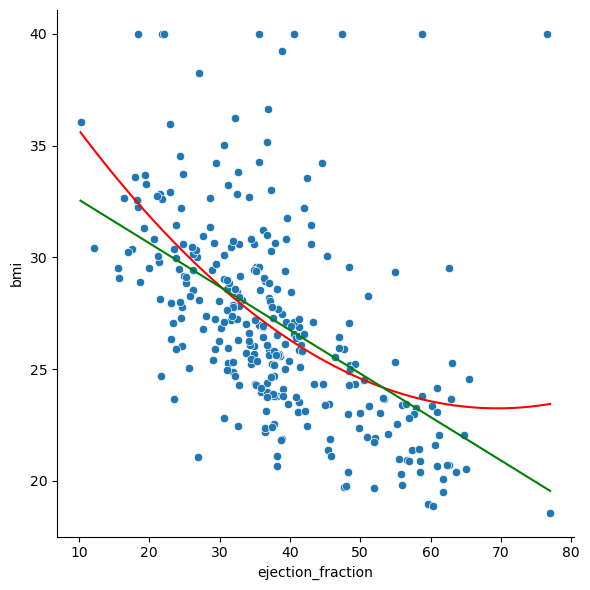

In [46]:
X_plot = np.arange(np.min(X['ejection_fraction']),np.max(X['ejection_fraction']),0.1).reshape(-1,1)
X_plot_6 = polynomial2.fit_transform(X_plot)

X_plot_6_scaled = X_plot_6
X_plot_6_scaled[:,1:] = scaler.transform(X_plot_6_scaled[:,1:])
y_plot_6 = results.predict(X_plot_6_scaled)

sns.relplot(y="bmi", x="ejection_fraction", height=6, data=df)
sns.lineplot(x=X_plot[:,0], y=y_plot_6,color='red')
sns.lineplot(x=X_plot[:,0], y=y_plot,color='green')

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot ef^2 + \beta_4 \cdot ef \cdot creatinine + \beta_5 \cdot creatinine^2 + \epsilon $$

It could be useful to have "interaction terms", because sometimes the target variable doesn't depend on one or another, but on the combination of them. High ef and low creatinine, taking the product could compensate.

In [47]:
variables = ['ejection_fraction', 'serum_creatinine']

X_train_7 = X_train[variables]
X_test_7 = X_test[variables]

polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_7 = polynomial2.fit_transform(X_train_7)
X_test_7 = polynomial2.fit_transform(X_test_7)

scaler = StandardScaler()

# Scale everything except the constant term (column index 0)
X_train_7[:, 1:] = scaler.fit_transform(X_train_7[:, 1:])
X_test_7[:, 1:] = scaler.transform(X_test_7[:, 1:])

# Convert to DataFrame, maintaining the column names
cols = polynomial2.get_feature_names_out()
X_train_7 = pd.DataFrame(X_train_7, columns=cols, index=train_index)
X_test_7 = pd.DataFrame(X_test_7, columns=cols, index=test_index)

In [48]:
X_train_7

,1,ejection_fraction,serum_creatinine,ejection_fraction^2,ejection_fraction serum_creatinine,serum_creatinine^2
52,1.00,1.68,4.77,1.78,5.75,4.74
257,1.00,0.42,-0.39,0.26,-0.20,-0.26
24,1.00,-0.58,0.35,-0.62,0.03,0.00
77,1.00,0.16,-0.21,0.00,-0.12,-0.21
33,1.00,-1.11,-0.21,-0.97,-0.43,-0.21
...,...,...,...,...,...,...
152,1.00,0.90,-0.48,0.79,-0.19,-0.28
204,1.00,0.60,-0.66,0.45,-0.39,-0.31
53,1.00,0.62,-0.39,0.47,-0.16,-0.26
294,1.00,-0.01,-0.30,-0.16,-0.23,-0.23


In [49]:
model = sm.OLS(y_train, X_train_7)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.80e-85
Time:                        00:58:52   Log-Likelihood:                -496.43
No. Observations:                 239   AIC:                             1005.
Df Residuals:                     233   BIC:                             1026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
1   

In [50]:
y_pred = results.predict(X_test_7)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_7.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6693
adj_R2: 0.6319
MSE: 4.9017


$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot ef \cdot creatinine + \beta_4 \cdot creatinine^2 + \epsilon $$

In [51]:
X_train_8 = X_train_7.drop('ejection_fraction^2', axis=1)
X_test_8 = X_test_7.drop('ejection_fraction^2', axis=1)

In [52]:
X_train_8

,1,ejection_fraction,serum_creatinine,ejection_fraction serum_creatinine,serum_creatinine^2
52,1.00,1.68,4.77,5.75,4.74
257,1.00,0.42,-0.39,-0.20,-0.26
24,1.00,-0.58,0.35,0.03,0.00
77,1.00,0.16,-0.21,-0.12,-0.21
33,1.00,-1.11,-0.21,-0.43,-0.21
...,...,...,...,...,...
152,1.00,0.90,-0.48,-0.19,-0.28
204,1.00,0.60,-0.66,-0.39,-0.31
53,1.00,0.62,-0.39,-0.16,-0.26
294,1.00,-0.01,-0.30,-0.23,-0.23


the test set could not be so representative of the population. Maybe it's missing some data, or maybe we should cross-validate (next time).

In [53]:
model = sm.OLS(y_train, X_train_8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     271.7
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.11e-86
Time:                        00:58:52   Log-Likelihood:                -496.51
No. Observations:                 239   AIC:                             1003.
Df Residuals:                     234   BIC:                             1020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
1   

In [54]:
y_pred = results.predict(X_test_8)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_8.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6688
adj_R2: 0.6382
MSE: 4.9087


## Categorical Features

To use them we need to transform categorical variables with one-hot encoding


In [55]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.00,0,582,0,20.73,1,265000.00,1.90,138.39,Male,0,4,True,30.82
1,55.00,0,7861,0,29.02,0,263358.03,1.10,131.90,Male,0,6,True,25.40
2,65.00,0,146,0,26.24,0,162000.00,1.30,143.66,Male,1,7,True,29.45
3,50.00,1,111,0,10.21,0,210000.00,1.90,135.03,Male,0,7,True,36.06
4,65.00,1,160,1,19.33,0,327000.00,2.70,136.08,Female,0,8,True,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38.05,1,155000.00,1.10,135.58,Male,1,270,False,25.60
295,55.00,0,1820,0,35.20,0,270000.00,1.20,142.02,Female,0,271,False,29.39
296,45.00,0,2060,1,62.32,0,742000.00,0.80,136.38,Female,0,278,False,20.71
297,45.00,0,2413,0,37.49,0,140000.00,1.40,133.91,Male,1,280,False,27.76


For a given cat variable, how many values/cat are there in the cat variables? (0/1, true/false, male/female/diverse, ...). It creates $k-1$ columns, where each of these referes to a specific value of the cat values. Each column will be binary (male column, female column) and mutually exclusive

In [56]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False) # drop the first value
encoded_feature = encoder.fit_transform(df[cat_vars])

df_encoded = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(cat_vars), index=df.index) # get_feature_names_out include the suffix in the column names

df_encoded = pd.concat([df.drop(cat_vars, axis=1), df_encoded], axis=1) # concatenate the numerical variables with the one-hot encoded categorical variables
df_encoded

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,bmi,anaemia_1,diabetes_1,high_blood_pressure_1,sex_Male,smoking_1,DEATH_EVENT_True
0,75.00,582,20.73,265000.00,1.90,138.39,4,30.82,0.00,0.00,1.00,1.00,0.00,1.00
1,55.00,7861,29.02,263358.03,1.10,131.90,6,25.40,0.00,0.00,0.00,1.00,0.00,1.00
2,65.00,146,26.24,162000.00,1.30,143.66,7,29.45,0.00,0.00,0.00,1.00,1.00,1.00
3,50.00,111,10.21,210000.00,1.90,135.03,7,36.06,1.00,0.00,0.00,1.00,0.00,1.00
4,65.00,160,19.33,327000.00,2.70,136.08,8,33.69,1.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,61,38.05,155000.00,1.10,135.58,270,25.60,0.00,1.00,1.00,1.00,1.00,0.00
295,55.00,1820,35.20,270000.00,1.20,142.02,271,29.39,0.00,0.00,0.00,0.00,0.00,0.00
296,45.00,2060,62.32,742000.00,0.80,136.38,278,20.71,0.00,1.00,0.00,0.00,0.00,0.00
297,45.00,2413,37.49,140000.00,1.40,133.91,280,27.76,0.00,0.00,0.00,1.00,1.00,0.00


$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot DEATH\_EVENT\_True + \epsilon $$

In [57]:
num_variables = ['ejection_fraction']
cat_variables = ['DEATH_EVENT_True'] # write the coded value

# scaling categorical values doesn't make sense, so we don't do that

X_train_9_num = X_train[num_variables]
X_test_9_num = X_test[num_variables]

X_train_9_cat = df_encoded.loc[train_index, cat_variables]
X_test_9_cat = df_encoded.loc[test_index, cat_variables]

X_train_9 = np.concatenate([X_train_9_num, X_train_9_cat], axis=1)
X_test_9 = np.concatenate([X_test_9_num, X_test_9_cat], axis=1)

cols = num_variables + cat_variables
X_train_9 = pd.DataFrame(X_train_9, index=train_index, columns=cols)
X_test_9 = pd.DataFrame(X_test_9, index=test_index, columns=cols)

X_train_9 = sm.add_constant(X_train_9)
X_test_9 = sm.add_constant(X_test_9)

In [58]:
model = sm.OLS(y_train, X_train_9)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     63.14
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.09e-22
Time:                        00:58:53   Log-Likelihood:                -652.12
No. Observations:                 239   AIC:                             1310.
Df Residuals:                     236   BIC:                             1321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                32.9851      0.86

<Axes: xlabel='ejection_fraction', ylabel='bmi'>

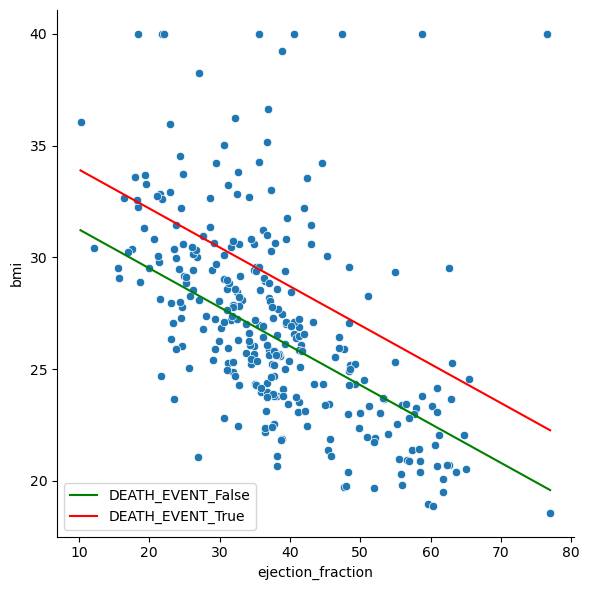

In [59]:
X_plot = np.arange(np.min(df['ejection_fraction']), np.max(df['ejection_fraction']), 0.1).reshape(-1, 1)
X_plot = sm.add_constant(X_plot)

# Create two versions of X_plot, one with the binary variable = 0, one with binary variable = 1
X_plot_0 = np.hstack([X_plot, np.zeros((X_plot.shape[0], 1))])  # Add column of 0's for binary_var = 0
X_plot_1 = np.hstack([X_plot, np.ones((X_plot.shape[0], 1))])   # Add column of 1's for binary_var = 1

y_plot_0 = results.predict(X_plot_0)  # Prediction for binary_var = 0
y_plot_1 = results.predict(X_plot_1)  # Prediction for binary_var = 1

sns.relplot(x="ejection_fraction", y="bmi", height=6, data=df, legend=False)

sns.lineplot(x=X_plot[:, 1], y=y_plot_0, color='green', label='DEATH_EVENT_False')
sns.lineplot(x=X_plot[:, 1], y=y_plot_1, color='red', label='DEATH_EVENT_True')

In [60]:
y_pred = results.predict(X_test_9)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_9.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.3593
adj_R2: 0.3250
MSE: 9.4958


$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot ef \cdot creatinine + \beta_4 \cdot creatinine^2 + \beta_5 \cdot DEATH\_EVENT\_True + \epsilon $$

In [61]:
num_variables = ['ejection_fraction', 'serum_creatinine']
cat_variables = ['DEATH_EVENT_True']

X_train_9_num = X_train[num_variables]
X_test_9_num = X_test[num_variables]

X_train_9_cat = df_encoded.loc[train_index, cat_variables]
X_test_9_cat = df_encoded.loc[test_index, cat_variables]

# Perform Polynomial Features transformation on the numerical data
polynomial2 = PolynomialFeatures(degree=2, include_bias=True)
X_train_9_poly = polynomial2.fit_transform(X_train_9_num)
X_test_9_poly = polynomial2.fit_transform(X_test_9_num)

# Scale the polynomial features except for the bias (constant) term
scaler = StandardScaler()
X_train_9_poly[:, 1:] = scaler.fit_transform(X_train_9_poly[:, 1:])
X_test_9_poly[:, 1:] = scaler.transform(X_test_9_poly[:, 1:])

# Concatenate the polynomial features with the one-hot encoded categorical variable
X_train_9 = np.concatenate([X_train_9_poly, X_train_9_cat], axis=1)
X_test_9 = np.concatenate([X_test_9_poly, X_test_9_cat], axis=1)

# Convert to DataFrame for easier handling
cols_poly = polynomial2.get_feature_names_out(num_variables)
cols = np.concatenate([cols_poly, X_train_9_cat.columns])

X_train_9 = pd.DataFrame(X_train_9, columns=cols, index=train_index)
X_test_9 = pd.DataFrame(X_test_9, columns=cols, index=test_index)

X_train_9.drop('ejection_fraction^2', axis=1, inplace=True)
X_test_9.drop('ejection_fraction^2', axis=1, inplace=True)


In [62]:
X_train_9

,1,ejection_fraction,serum_creatinine,ejection_fraction serum_creatinine,serum_creatinine^2,DEATH_EVENT_True
52,1.00,1.68,4.77,5.75,4.74,1.00
257,1.00,0.42,-0.39,-0.20,-0.26,0.00
24,1.00,-0.58,0.35,0.03,0.00,1.00
77,1.00,0.16,-0.21,-0.12,-0.21,0.00
33,1.00,-1.11,-0.21,-0.43,-0.21,0.00
...,...,...,...,...,...,...
152,1.00,0.90,-0.48,-0.19,-0.28,0.00
204,1.00,0.60,-0.66,-0.39,-0.31,0.00
53,1.00,0.62,-0.39,-0.16,-0.26,1.00
294,1.00,-0.01,-0.30,-0.23,-0.23,0.00


In [63]:
model = sm.OLS(y_train, X_train_9)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.79e-85
Time:                        00:58:53   Log-Likelihood:                -496.43
No. Observations:                 239   AIC:                             1005.
Df Residuals:                     233   BIC:                             1026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
1   

In [64]:
y_pred = results.predict(X_test_9)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_9.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6707
adj_R2: 0.6334
MSE: 4.8809


# Diagnostics

Let's check the assumptions of linear regression.

$$e_i=y_i-\hat y_i$$

Assumptions:

1. There is a linear relationship between the predictors and the response
2. $\epsilon_i$ (residuals) are indipendent
3. $Var(\epsilon_i) = \sigma^2 \quad \forall i $ (homoschedasticity)

and for inference:

4. $\epsilon_i \sim N(0,\sigma^2) \quad \forall i$ (normality) --- or at least large $n$ (sample size). The resifual should follow a normal distribution

Let's consider the model

$$ bmi = \beta_0 + \beta_1 \cdot ef + \beta_2 \cdot creatinine + \beta_3 \cdot \text{creatinine_phosphokinase} + \epsilon $$

the math behind linear regression (p-values, std errors, conf intervals of the coefficients, ...) OLS relies on some assumptions, so we need to check if they're verified, because often they are not and we need some implications. If the assumptions are not validated, I cannot fully rely on the chosen predictors. I cannot say that a predictor is usful just because the p-value is 0.

In [65]:
variables = ['ejection_fraction', 'serum_creatinine', 'creatinine_phosphokinase']

X_train_5 = X_train[variables]
X_test_5 = X_test[variables]
X_train_5 = sm.add_constant(X_train_5)
X_test_5 = sm.add_constant(X_test_5)

Let's verify the assumptions
1. let's come back later
2. how do we verify this? in the 3rd table there is a reference test called "Durbin-Watson" that is useful

In [66]:
model = sm.OLS(y_train, X_train_5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     279.6
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.16e-77
Time:                        00:58:58   Log-Likelihood:                -521.77
No. Observations:                 239   AIC:                             1052.
Df Residuals:                     235   BIC:                             1065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Independence

Results summary includes Durbin-Watson test. The values of its test statistics are between 0 and 4. Values near 2 indicates no autocorrelation (independence), smaller values indicate positive autocorrelation, higher values negative autocorrelation

In [67]:
from statsmodels.stats.stattools import durbin_watson

If near 2, the residual could be considered independent

In [68]:
durbin_watson(results.resid)

np.float64(2.1193931996374853)

## Linearity & Homoschedasticity

We can visually inspect the residuals

Both of them can be understood by visualizing the residuals but also the fitted values. We could do a scatter plot to visualize them.

Homosc means that the pred shoud have same variances

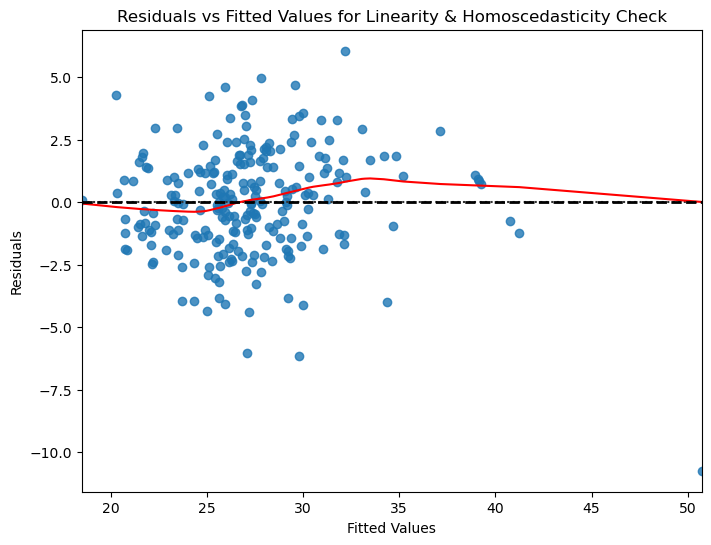

In [69]:
fitted_vals = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals,
              lowess=True, # Add a smooth trendline
              line_kws={'color': 'red', 'lw': 1.5})
plt.axhline(0, color='black', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Linearity & Homoscedasticity Check')
plt.show()

the lowess=True is a smooth approx of the behavior that is automatically computed.

Breusch-Pagan statistical test for homoschedascity.

*H0: residuals are homoschedastic*

In [70]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(results.resid, X_train_5) # It's not very used, as it is very conservative (very easy to reject and say that there's no homoschedasticity)

print(f'p-value: {bp_test[1]}')

p-value: 1.6482512198897144e-06


## Gaussianity

Results summary includes the Jacques-Bera test for normality on residuals.

*H0: data are gaussian.*

This test has poor power for n < 100.

Other methods we previosly saw are the QQ-plot (graphical) and the Shapiro-Wilk test (good power for n < 2000)

A very low p-value in JB test, I should reject the null hypothesis

In [71]:
print(f'Jacques-Bera test p-value: {results.diagn["jbpv"]:.4f}')

Jacques-Bera test p-value: 0.0000


In [72]:
sw = stats.shapiro(results.resid).pvalue
print(f'Shapiro-Wilk test p-value: {sw:.4f}')

Shapiro-Wilk test p-value: 0.0009


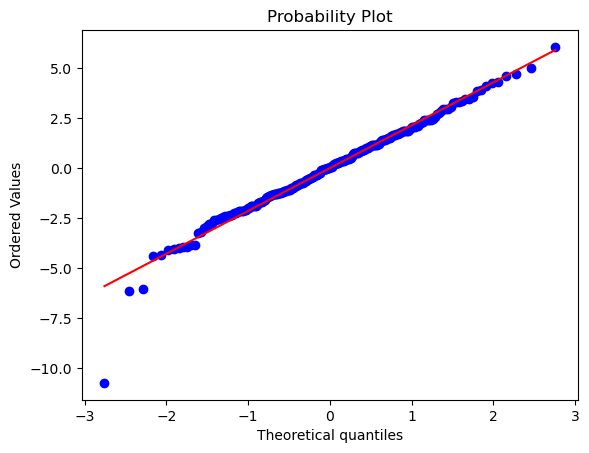

In [73]:
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()

## Transform y

In [74]:
y_train_10 = np.sqrt(y_train)
y_test_10 = np.sqrt(y_test)

# y_train_10 = np.log(y_train + 1)
# y_test_10 = np.log(y_test + 1)

# y_train_10 = np.cbrt(y_train)
# y_test_10 = np.cbrt(y_test)

model = sm.OLS(y_train_10, X_train_5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     258.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           3.41e-74
Time:                        00:58:59   Log-Likelihood:                 35.522
No. Observations:                 239   AIC:                            -63.04
Df Residuals:                     235   BIC:                            -49.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [75]:
y_pred = results.predict(X_test_5)
r2 = r2_score(y_test_10,y_pred)
mse = mean_squared_error(y_test_10,y_pred)
n = len(y_test)
p = X_test_5.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6270
adj_R2: 0.5999
MSE: 0.0503


In [76]:
sw = stats.shapiro(results.resid).pvalue
print(f'Shapiro-Wilk test p-value: {sw:.4f}')

Shapiro-Wilk test p-value: 0.0013


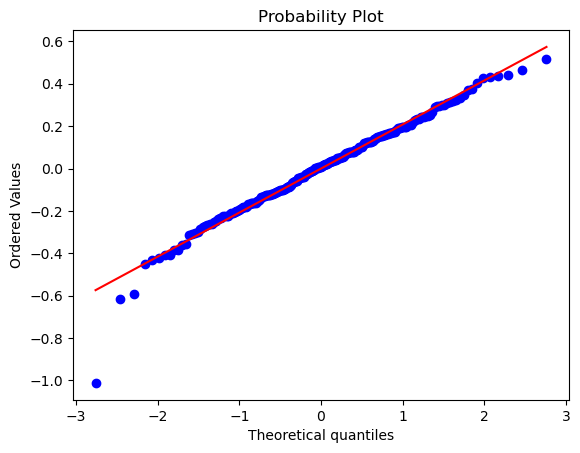

In [77]:
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()

## Leverages & outliers

**Outliers**: points with a very high residual (bad fit)
Residuals are standardized so to make it easier to spot outliers (those outside +- 2 or +- 3)

**Leverages**: points with unusual value

Hat Matrix $H$ s.t. $\hat{y}=Hy$

$H = X(X^TX)^{-1}X^T$

the leverage of point $i$ is $h_{ii} = x_i^T(X^TX)^{-1}x_i \in (0,1)$



**Cook's distance**: a measure of the point's overall influence of the model

$$
D_i = \frac{\epsilon_i^2}{k \cdot \sigma^2} \cdot \frac{h_{ii}}{(1-h_{ii})^2}
$$

combining the size of the (standardized) residuals, with respect to the model parameters, and the leverage

If there are points with high Cook's distance, I should look into the data to see what's happening

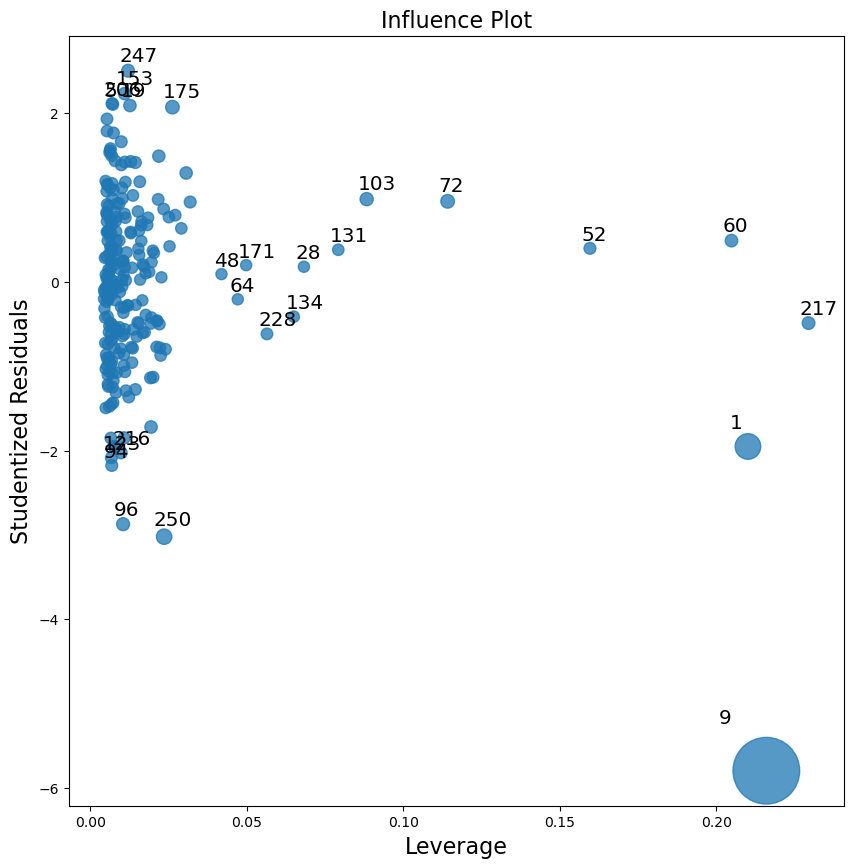

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
sm.graphics.influence_plot(results, criterion="cooks", ax=ax);

The bigger is the point, the higher is the Cook's distance. The point in the right bottom angle has very low residual, high leverage and high Cook's distance

In [79]:
influence = results.get_influence()

influence_df = influence.summary_frame()[['cooks_d', 'student_resid', 'hat_diag']]

influence_df = influence_df.rename(columns={'hat_diag': 'leverage'}).sort_values(by='cooks_d', ascending=False)

influence_df

,cooks_d,student_resid,leverage
9,2.03,-5.80,0.22
1,0.25,-1.95,0.21
250,0.05,-3.02,0.02
72,0.03,0.96,0.11
175,0.03,2.07,0.03
...,...,...,...
37,0.00,0.03,0.01
158,0.00,0.02,0.01
214,0.00,0.02,0.01
21,0.00,0.02,0.01


The point 9 has a significant influence on the model

In [80]:
X_train.loc[9]

age                            80.00
anaemia                            1
creatinine_phosphokinase         123
diabetes                           0
high_blood_pressure                1
platelets                  388000.00
serum_creatinine                9.40
serum_sodium                  126.90
sex                             Male
smoking                            1
ejection_fraction              35.63
time                              10
Name: 9, dtype: object

## Removing (high leverage) outliers

In [81]:
to_remove = [9]

X_train_11 = X_train_5.drop(to_remove)
y_train_11 = y_train.drop(to_remove)
X_test_11 = X_test_5
y_test_11 = y_test
model = sm.OLS(y_train_11, X_train_11)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     319.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.76e-82
Time:                        00:59:00   Log-Likelihood:                -503.04
No. Observations:                 238   AIC:                             1014.
Df Residuals:                     234   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Now the Prob(JB) completely changes

In [82]:
y_pred = results.predict(X_test_11)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
n = len(y_test)
p = X_test_11.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2: {r2:.4f}')
print(f'adj_R2: {adj_r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.6463
adj_R2: 0.6205
MSE: 5.2429


In [83]:
sw = stats.shapiro(results.resid).pvalue
print(f'Shapiro-Wilk test p-value: {sw:.4f}')

Shapiro-Wilk test p-value: 0.9159


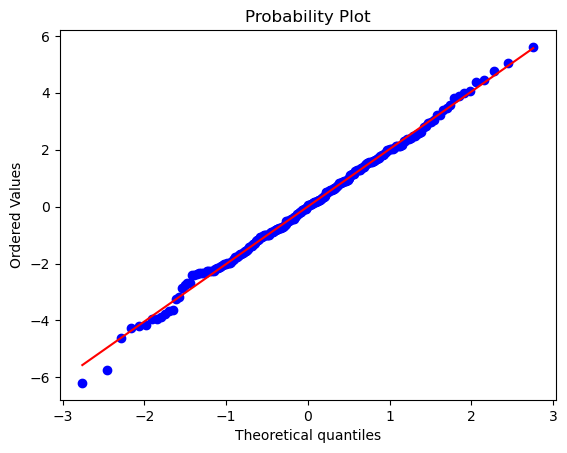

In [84]:
stats.probplot(results.resid, dist="norm", plot=plt)
plt.show()

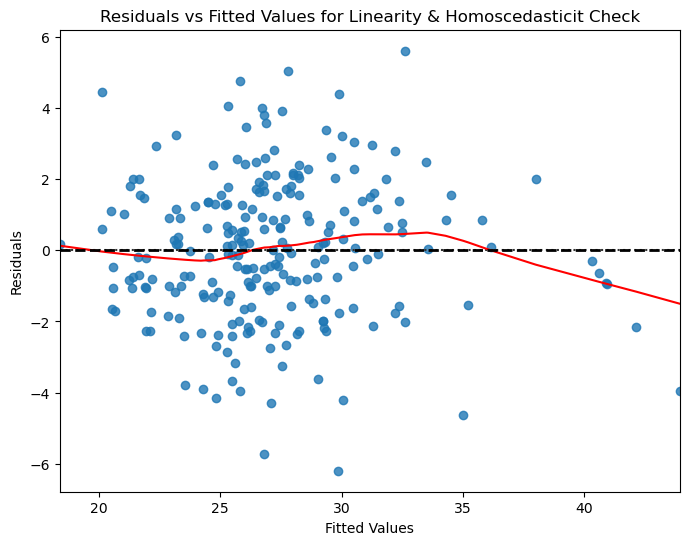

In [85]:
fitted_vals = results.fittedvalues
residuals = results.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 1.5})  # Add a smooth trendline

plt.axhline(0, color='black', linestyle='--', lw=2)  # Horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Linearity & Homoscedasticit Check')
plt.show()

In [86]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(results.resid, X_train_11)

print(f'p-value: {bp_test[1]}')

p-value: 0.45266279791910435


# Quiz


# Anscombe dataset

Four datasets with nearly identical:

* Mean of
$x$ and $y$

* Variance of
$x$ and $y$

* Correlation between
$x$ and $y$

* Regression line ($y$ = 3.00 + 0.50$x$ )

* $𝑅^2$
  and standard error

In [ ]:
# Load the built-in Anscombe dataset
df = sns.load_dataset("anscombe")

datasets = ['I', 'II', 'III', 'IV']
models = {}

# Plot setup
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Anscombe's Quartet: Regression & Residuals", fontsize=16)

for i, name in enumerate(datasets):
    data = df[df['dataset'] == name]

    x = data['x']
    y = data['y']
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    models[name] = model

    # Scatter plot with regression line (top row)
    ax1 = axes[0, i]
    ax1.scatter(x, y, color='blue')
    ax1.plot(x, model.predict(X), color='red')
    ax1.set_title(f'Dataset {i+1}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # Residual plot (bottom row)
    ax2 = axes[1, i]
    ax2.scatter(x, model.resid, color='#ff6600')
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.set_title(f'Residuals {i+1}')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

# Show all plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print regression summaries
for name, model in models.items():
    print(f"\n=== Summary for Dataset {name} ===")
    print(model.summary())


In [ ]:
## TODO: for datasets III and IV compute leverages and Cook distances

# Homework

What happens if instead you model the ejection fraction as the dependent variable?

Try to build the best linear regression model to predict ejection fraction